In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# sort the data
pd.set_option('display.max_rows', 10)

## load data

[http://catalog.data.gov/dataset/baltimore-city-employee-salaries-fy2016](https://catalog.data.gov/dataset/baltimore-city-employee-salaries-fy2016)

In [3]:
data= pd.read_csv('./data/Baltimore_City_Employee_Salaries_FY2016.csv')

> 当然也可以通过 **`requests`** 的方式进行下载

import  requests<br/>
import StringIO as StringIO<br/>
url = "https://data.baltimorecity.gov/api/views/65ac-s4v5/rows.csv?accessType=DOWNLOAD"<br/>
r = requests.get(url)<br/>
data = StringIO.StringIO(r.content)<br/>
data = pd.read_csv(data, header=0)<br/>

In [4]:
data.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,$56705.00,$54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,$75500.00,$72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,$60060.00,$59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,$70000.00,$59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,$64365.00,$74770.82


In [5]:
data['AnnualSalary'] = data['AnnualSalary'].str.lstrip('$')
data['AnnualSalary'].head()

0    56705.00
1    75500.00
2    60060.00
3    70000.00
4    64365.00
Name: AnnualSalary, dtype: object

In [6]:
print(type(data['AnnualSalary'][0]))

<class 'str'>


> 因为 **`AnnualSalary`** 是字符串类型，所以我们在下面进行转化。

In [7]:
data['AnnualSalary'] = data['AnnualSalary'].astype(float)
print(type(data['AnnualSalary'][0]))

<class 'numpy.float64'>


In [8]:
data.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,56705.0,$54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,75500.0,$72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,60060.0,$59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,70000.0,$59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,64365.0,$74770.82


In [9]:
data['GrossPay'] = data['GrossPay'].str.lstrip('$')
data['GrossPay'] = data['GrossPay'].astype(float)
print(type(data['GrossPay'][0]))

<class 'numpy.float64'>


## group/aggregate(合计)

In [10]:
grouped = data.groupby(['JobTitle'])['AnnualSalary']
grouped

In [11]:
aggregated = grouped.agg([np.sum, np.mean, np.std, np.size, np.min, np.max])
aggregated.head()

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
911 LEAD OPERATOR,199267.0,49816.750000,690.500000,4.0,48781.0,50162.0
911 OPERATOR,2913915.0,44829.461538,4145.426954,65.0,36681.0,50829.0
911 OPERATOR SUPERVISOR,228814.0,57203.500000,751.000000,4.0,56077.0,57579.0
ACCOUNT EXECUTIVE,228800.0,57200.000000,0.000000,4.0,57200.0,57200.0
ACCOUNTANT I,735988.0,49065.866667,3918.451277,15.0,41326.0,57579.0


> 下面排序的时候，可以直接一个 **字符串** 作为排序的依据，也可以使用 **列表** 作为多重排序。

In [13]:
output = aggregated.sort_values('amax', ascending=False)
output.head(10)   # 通过下面可以看到 STATE'S ATTORNEY 的最高。

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
STATE'S ATTORNEY,238772.0,238772.000000,NaN,1.0,238772.0,238772.0
Executive Director III,1713065.0,171306.500000,20577.730148,10.0,140800.0,204000.0
Police Commissioner,200000.0,200000.000000,NaN,1.0,200000.0,200000.0
CONTRACT SERV SPEC II,8527323.0,59217.520833,30066.705518,144.0,17160.0,187200.0
Executive Director V,182500.0,182500.000000,NaN,1.0,182500.0,182500.0
MAYOR,171635.0,171635.000000,NaN,1.0,171635.0,171635.0
DIRECTOR PUBLIC WORKS,169800.0,169800.000000,NaN,1.0,169800.0,169800.0
CITY SOLICITOR,169800.0,169800.000000,NaN,1.0,169800.0,169800.0
Executive Director IV,599300.0,149825.000000,12614.640965,4.0,139500.0,167900.0


## 总和

> 在使用 **`sort_values`** 的时候，在给 **`ascending`** 赋值的时候，除了使用单一的 **`bool`** 值之外，还可以使用 **`bool的列表`** ，这种情况是排序的条件也是列表的时候， 这样是为了应对 **`多个条件的排序的顺序不同的情况而使用`** 。

In [14]:
output = aggregated.sort_values(['sum', 'size'], ascending=[False, True])
output.head(10)     # 可以看出这种情况加是police的最高。

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
POLICE OFFICER,123770248.0,70404.009101,10483.930680,1758.0,48971.0,83881.0
EMT Firefighter Suppression,22354519.0,63688.088319,4651.674738,351.0,47475.0,75197.0
POLICE SERGEANT,21464803.0,91339.587234,5155.807547,235.0,77384.0,97309.0
POLICE OFFICER (EID),18849786.0,75098.749004,6500.581964,251.0,50815.0,85906.0
LABORER (Hourly),17232425.0,31274.818512,1354.557537,551.0,29453.0,35609.0
ASSISTANT STATE'S ATTORNEY,11795538.0,75130.815287,11682.941916,157.0,64600.0,102200.0
OFFICE SUPPORT SPECIALIST III,10774681.0,35560.003300,2899.921128,303.0,29672.0,45057.0
Fire Lieutenant Suppression,10102557.0,82807.844262,4390.203294,122.0,73821.0,86247.0
RECREATION ARTS INSTRUCTOR,9712520.0,24776.836735,5555.508885,392.0,17160.0,41600.0


In [16]:
aggregated = grouped.agg(['sum'])
output = aggregated.sort_values('sum', ascending=False)
output = output.head(10)
output.rename(columns={'sum': 'Salary'}, inplace=True)

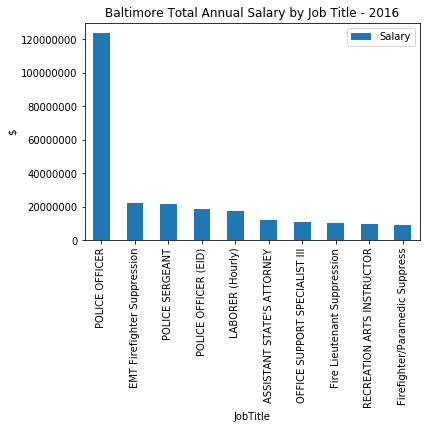

In [22]:
from matplotlib.ticker import FormatStrFormatter

myplot = output.plot(kind='bar', title='Baltimore Total Annual Salary by Job Title - 2016')
myplot.set_ylabel('$')
# 下面这样的处理是为了y轴的值的显示。
myplot.yaxis.set_major_formatter(FormatStrFormatter('%d'))